# **Importing all the Neccesary packages**
---


- **os** 📁: Provides functions for interacting with the operating system, such as file operations.


- **pandas** 🐼: Used for data manipulation and analysis, particularly for handling structured data.

- **numpy** 🧮: Essential for numerical operations and array manipulations.


- **matplotlib.pyplot** 📊: Enables plotting and visualization of data.


- **cartopy.crs** 🌍: Provides geospatial coordinate reference system transformations.


- **cartopy.feature** 🗺️: Offers access to various geospatial features for plotting maps.


- **matplotlib.colors.Normalize** 🌈: Helps normalize data values to colormap indices for plotting.


- **xarray** 📦: Used for labeled multi-dimensional arrays and advanced data manipulation.


- **matplotlib.animation** 🎥: Allows the creation of animations from visualizations.


- **matplotlib.gridspec.GridSpec** 📏: Facilitates the creation of multi-plot grids in matplotlib.


- **multiprocessing** 🔄: Provides support for concurrent execution using multiple processes.


- **tqdm** 📊: Displays progress bars for loops and operations, useful for tracking iterative processes.


- **warnings** ⚠️: Controls how warnings are displayed or ignored.


- **torch** 🔥: PyTorch deep learning framework for building and training neural networks.


- **torch.nn** 🧠: PyTorch's neural network module for defining layers and models.


- **torch.optim** ⚙️: Contains optimization algorithms such as SGD, Adam, etc., for training models.


- **sklearn.preprocessing.MinMaxScaler** 📈: Scales data to a specified range, useful for preprocessing input data.


- **math** ➕✖️: Provides mathematical functions.


- **psutil** 💻: Offers system and process utilities, useful for system monitoring and management.


- **datetime** 📅⏰: Provides classes for manipulating dates and times in Python.


In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from matplotlib.colors import Normalize
import xarray as xr
from matplotlib import animation
from matplotlib.gridspec import GridSpec
import matplotlib.gridspec as gridspec
import multiprocessing
from tqdm import tqdm
import warnings
import torch
import torch.nn as nn
import numpy as np
import math
import multiprocessing
import psutil
from IPython.display import Image

from datetime import datetime
from sklearn.preprocessing import MinMaxScaler

import torch.optim as optim

In [2]:
"""To see how many cores are avalable for processing"""

# Step 1: Set up a global multiprocessing pool
total_cores = psutil.cpu_count(logical=True)
cores_to_use = max(1, int(total_cores * 1))
print(f"Using {cores_to_use} out of {total_cores} available cores.")

# Initialize the global pool
global_pool = multiprocessing.Pool(cores_to_use)

print(global_pool)


Using 16 out of 16 available cores.
<multiprocessing.pool.Pool state=RUN pool_size=16>


# 🌤️ **South Bengal Weather Data Import and Description** 🌤️

## Introduction
For our weather forecasting project, we have sourced data from the [NASA POWER Data Access Viewer](https://power.larc.nasa.gov/data-access-viewer/). The dataset covers the South Bengal region, as shown in the screenshot below:

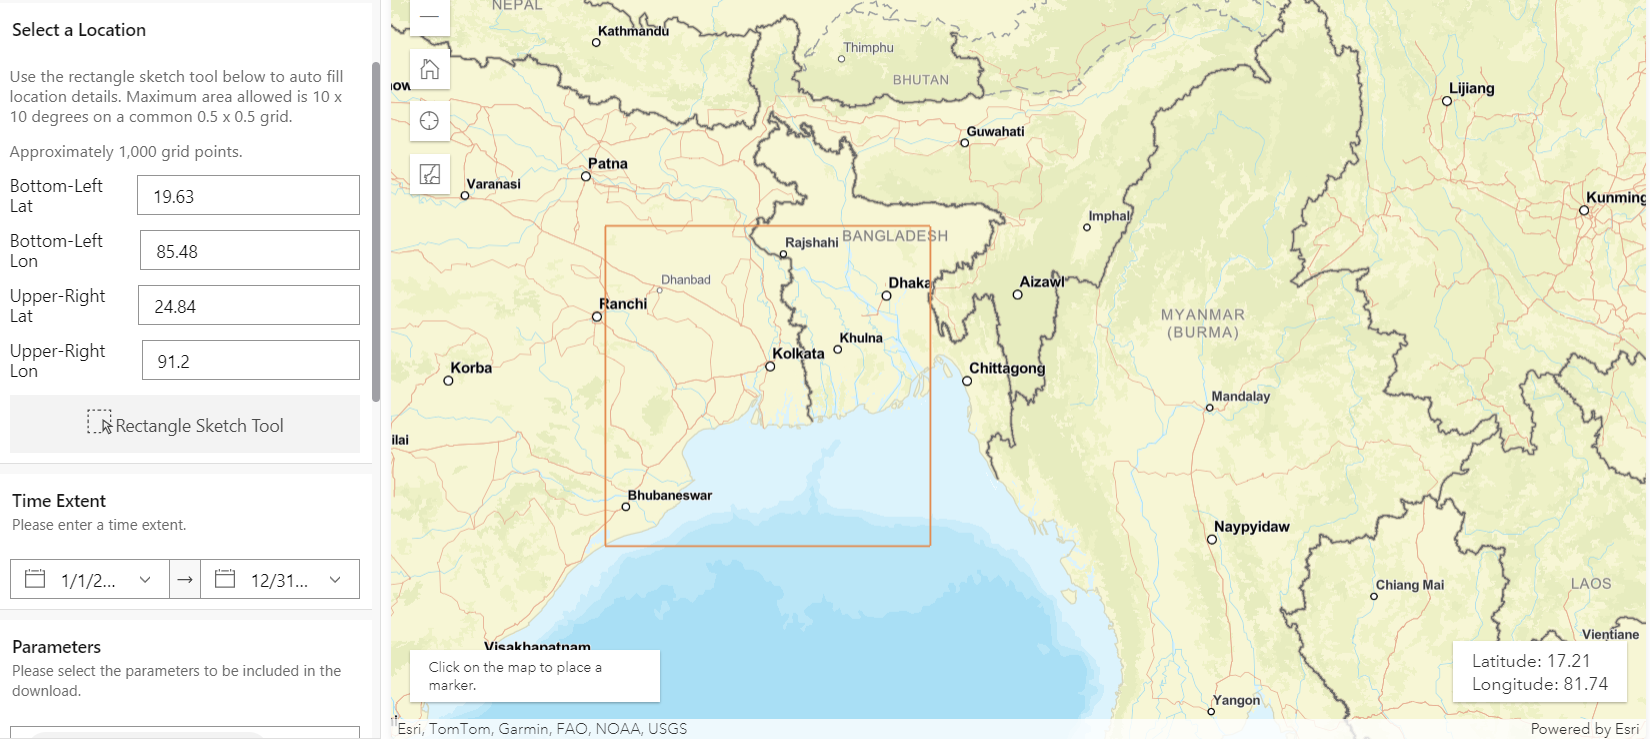

## Weather Parameters
---
We focus on 10 key weather parameters, which are crucial for accurate weather forecasting. These parameters, along with their units, are described below:

1. 🌡️ **TS (Surface Temperature):** Temperature at the surface, measured in degrees Celsius (°C).


2. 🌞 **T2M_MAX (Maximum Temperature at 2 meters):** The highest temperature recorded at 2 meters above the ground, measured in degrees Celsius (°C).


3. 🌛 **T2M_MIN (Minimum Temperature at 2 meters):** The lowest temperature recorded at 2 meters above the ground, measured in degrees Celsius (°C).


4. 💧 **RH2M (Relative Humidity at 2 meters):** The amount of moisture in the air at 2 meters above the ground, expressed as a percentage (%).


5. 🌬️ **PS (Surface Pressure):** The atmospheric pressure at the surface, measured in Pascals (Pa).


6. 🧭 **WD10M (Wind Direction at 10 meters):** The direction from which the wind is blowing at 10 meters above the ground, measured in degrees (°).


7. 🌪️ **WS10M_MAX (Maximum Wind Speed at 10 meters):** The highest wind speed recorded at 10 meters above the ground, measured in meters per second (m/s).


8. 🌪️ **WS10M_MIN (Minimum Wind Speed at 10 meters):** The lowest wind speed recorded at 10 meters above the ground, measured in meters per second (m/s).
9. ☀️ **ALLSKY_SFC_SW_DWN (All-Sky Surface Shortwave Downward Irradiance):**

The solar irradiance reaching the Earth's surface, measured in watts per square meter (W/m²).

## Data Collection Period
We have collected 40 years of weather data from **01.01.1984** to **31.12.2023**. Due to the large volume of data, it was divided into three separate CSV files:

1. `2001-2023_weather.csv`
2. `1991-2000_weather.csv`
3. `1984-1990_weather.csv`

### Combining the Data
To create a comprehensive dataset, we combined the three CSV files into a single dataset. This allows for efficient data processing and analysis.

By leveraging this rich dataset, we aim to improve our weather forecasting models and provide accurate predictions for the South Bengal region. 🌧️🌞🌈

In [5]:
# Take the folder

folder_path = "../data_files"

In [6]:
df_path_1 = os.path.join(folder_path, "2001-2023_weather.csv")
df_1 = pd.read_csv(f"{df_path_1}")
df_path_2 = os.path.join(folder_path, "1991-2000_weather.csv")
df_2 = pd.read_csv(f"{df_path_2}")
df_path_3 = os.path.join(folder_path, "1984-1900_weather.csv")
df_3 = pd.read_csv(f"{df_path_3}")


In [7]:
df = pd.concat([df_3,df_2, df_1], ignore_index=True)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1767810 entries, 0 to 1767809
Data columns (total 15 columns):
 #   Column             Dtype  
---  ------             -----  
 0   LAT                float64
 1   LON                float64
 2   YEAR               int64  
 3   MO                 int64  
 4   DY                 int64  
 5   ALLSKY_SFC_SW_DWN  float64
 6   TS                 float64
 7   T2M_MAX            float64
 8   T2M_MIN            float64
 9   RH2M               float64
 10  PRECTOTCORR        float64
 11  PS                 float64
 12  WS10M_MAX          float64
 13  WS10M_MIN          float64
 14  WD10M              float64
dtypes: float64(12), int64(3)
memory usage: 202.3 MB


make a DATE column which contains all the dates for each sectors and features

In [9]:
# Rename columns to lowercase
df = df.rename(columns={'YEAR': 'year', 'MO': 'month', 'DY': 'day'})

# Combine year, month, day into a single date column
df['DATE'] = pd.to_datetime(df[['year', 'month', 'day']])

The dataset encompasses a geographic grid comprising **11 latitudes and 11 longitudes**, resulting in a total of 121 sectors (mini areas).

For each of these sectors, the dataset provides detailed climate data for 10 distinct features, spanning a period of **40 year**s. This extensive temporal and spatial coverage enables comprehensive analysis and accurate weather forecasting for the South Bengal region.

In [10]:
print(df.head().to_string(), end="\f\n")

     LAT    LON  year  month  day  ALLSKY_SFC_SW_DWN     TS  T2M_MAX  T2M_MIN   RH2M  PRECTOTCORR      PS  WS10M_MAX  WS10M_MIN  WD10M       DATE
0  19.75  85.75  1984      1    1               3.66  22.50    25.41    17.99  56.76          0.0  101.41       5.40       1.67  78.54 1984-01-01
1  19.75  86.25  1984      1    1               3.92  22.78    24.77    19.58  56.03          0.0  101.63       5.76       2.39  71.94 1984-01-01
2  19.75  86.75  1984      1    1               3.92  24.20    23.71    21.88  53.41          0.0  101.65       5.99       2.12  56.81 1984-01-01
3  19.75  87.25  1984      1    1               4.02  25.31    23.52    22.81  52.54          0.0  101.67       6.38       2.41  41.54 1984-01-01
4  19.75  87.75  1984      1    1               4.02  25.88    23.53    23.04  52.41          0.0  101.68       6.65       3.01  36.35 1984-01-01


In [11]:
weather_data = df

# **Data visualization**

In [13]:
visualization_videos_folder_path = os.path.join("./","Visualization")
if not os.path.exists(visualization_videos_folder_path):
    os.makedirs(visualization_videos_folder_path)

## **Temperature Plot Animation**
---

In this section, an animated video plot is generated to visualize the changes in Surface Temperature, Max Temperature, and Min Temperature over the course of one year.

### Plotting Details

- **Surface Temperature**: Shows the overall temperature variation at the surface level.
- **Max Temperature**: Indicates the maximum recorded temperature over the period.
- **Min Temperature**: Represents the minimum recorded temperature throughout the year.

### Video Animation

A video animation is created to illustrate the temporal changes in these temperature metrics, providing an insightful overview of the yearly temperature trends.

### Implementation Details

- Utilizes matplotlib and its animation capabilities to generate the dynamic visualization.
- Each frame in the animation represents a snapshot of temperature changes at different time intervals throughout the year.

### Insights

This visualization aids in understanding seasonal temperature patterns and fluctuations, crucial for climate analysis and forecasting.



### **1984 year smooth plot - temperature**
---
the plot contains the map according to the latitude and longitute and also contain the temperature lines

Animation saved at: ./Visualization\Temperature_1984.gif


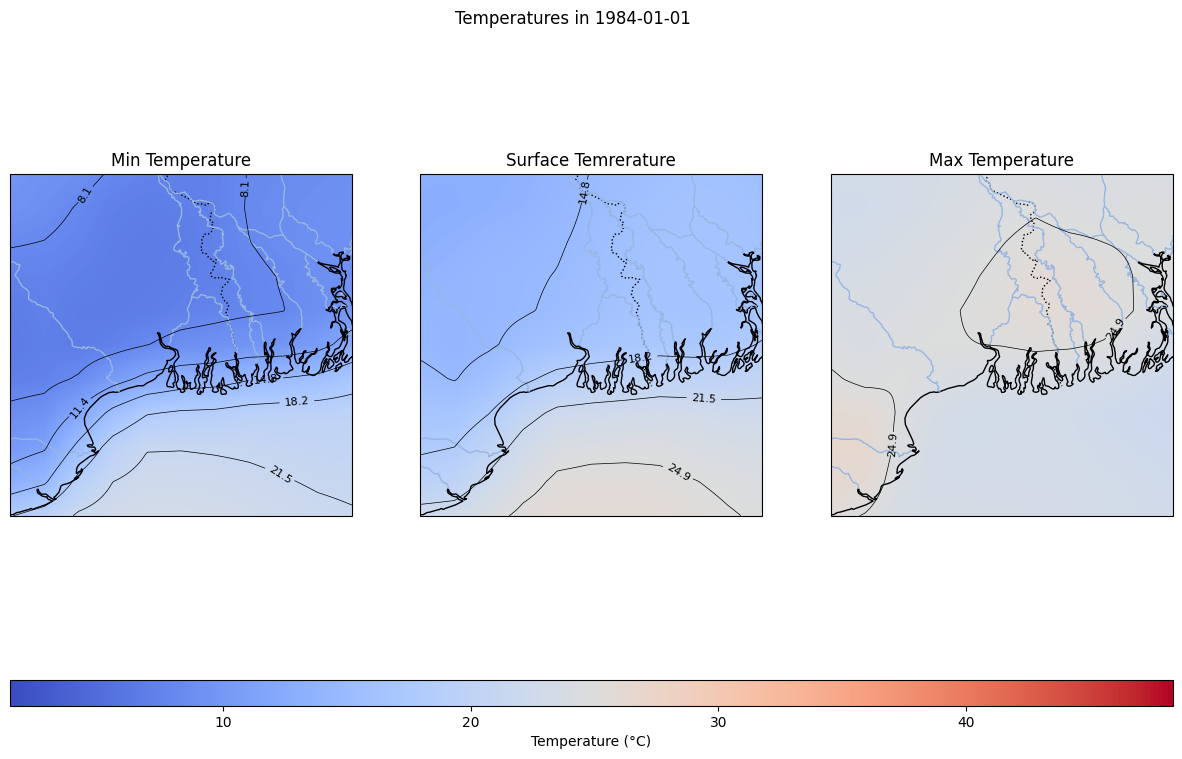

In [14]:
import warnings
warnings.filterwarnings('ignore')

# Convert the DataFrame to an xarray Dataset
ds = df.set_index(['DATE', 'LAT', 'LON']).to_xarray()
ds = ds.rename({'LAT': 'lat', 'LON': 'lon', 'T2M_MAX': 'temperature_max', 'T2M_MIN': 'temperature_min', 'TS':'Surface_temperature'})
temperature_min = ds['temperature_min']
temperature_max = ds['temperature_max']
surface_temperature = ds['Surface_temperature']

# Determine the fixed scale for the colorbar based on the entire dataset
vmin = temperature_min.min().values
vmax = temperature_max.max().values

# Function to plot each frame with interpolation
def plot_frame(date):
    fig.clf()
    gs = GridSpec(2, 3, height_ratios=[1, 0.05], width_ratios=[1, 1,1], hspace=0.3)
    ax_min = fig.add_subplot(gs[0, 0], projection=ccrs.PlateCarree())
    ax_surface = fig.add_subplot(gs[0, 1], projection=ccrs.PlateCarree())
    ax_max = fig.add_subplot(gs[0, 2], projection=ccrs.PlateCarree())

    cax = fig.add_subplot(gs[1, :])

    # Create the subplots for temperature_min and temperature_max
    for ax, temp_data, title in zip([ax_min, ax_surface, ax_max], [temperature_min, surface_temperature, temperature_max], ['Min Temperature', 'Surface Temrerature', 'Max Temperature']):
        ax.set_extent([temp_data.lon.min(), temp_data.lon.max(), temp_data.lat.min(), temp_data.lat.max()], crs=ccrs.PlateCarree())
        ax.coastlines()
        ax.add_feature(cfeature.BORDERS, linestyle=':')
        ax.add_feature(cfeature.LAND, edgecolor='black')
        ax.add_feature(cfeature.LAKES, alpha=0.5)
        ax.add_feature(cfeature.RIVERS)

        day_data = temp_data.sel(DATE=date)

        # Create a grid for interpolation
        lon = np.linspace(day_data.lon.min(), day_data.lon.max(), 200)
        lat = np.linspace(day_data.lat.min(), day_data.lat.max(), 200)
        lon2d, lat2d = np.meshgrid(lon, lat)
        day_data_interp = day_data.interp(lon=lon, lat=lat, method='linear')

        # Create the heatmap with fixed scale and smooth shading
        pcm = ax.pcolormesh(lon2d, lat2d, day_data_interp, shading='auto', cmap='coolwarm', norm=Normalize(vmin=vmin, vmax=vmax))

        # Add contour lines to both plots
        contours = ax.contour(lon2d, lat2d, day_data_interp, levels=np.linspace(vmin, vmax, 15), colors='black', linewidths=0.5)
        ax.clabel(contours, inline=True, fontsize=8, fmt='%1.1f')

        # Update the title
        ax.set_title(title)
        ax.set_xlabel('Longitude')
        ax.set_ylabel('Latitude')

    # Create a single colorbar for both subplots
    cbar = fig.colorbar(pcm, cax=cax, orientation='horizontal', label='Temperature (°C)')
    plt.suptitle(f'Temperatures in {date.strftime("%Y-%m-%d")}')
    plt.tight_layout(rect=[0, 0, 1, 0.95])

# Create the animation
dates = pd.date_range(start='1984-01-01', end='1984-12-31')
fig = plt.figure(figsize=(15, 8))

ani = animation.FuncAnimation(fig, plot_frame, frames=dates, repeat=False)

# Save the animation as a gif file
tem_vid_path = os.path.join(visualization_videos_folder_path, "Temperature_1984.gif")

# Save the animation as a video file or GIF
ani.save(tem_vid_path, writer='pillow', fps=20)

print(f"Animation saved at: {tem_vid_path}")

### **2023 year smooth plot - tempareture**
---
the plot contains the map according to the latitude and longitute and also contain the temperature lines

Animation saved at: ./Visualization\Temperature_2023.gif


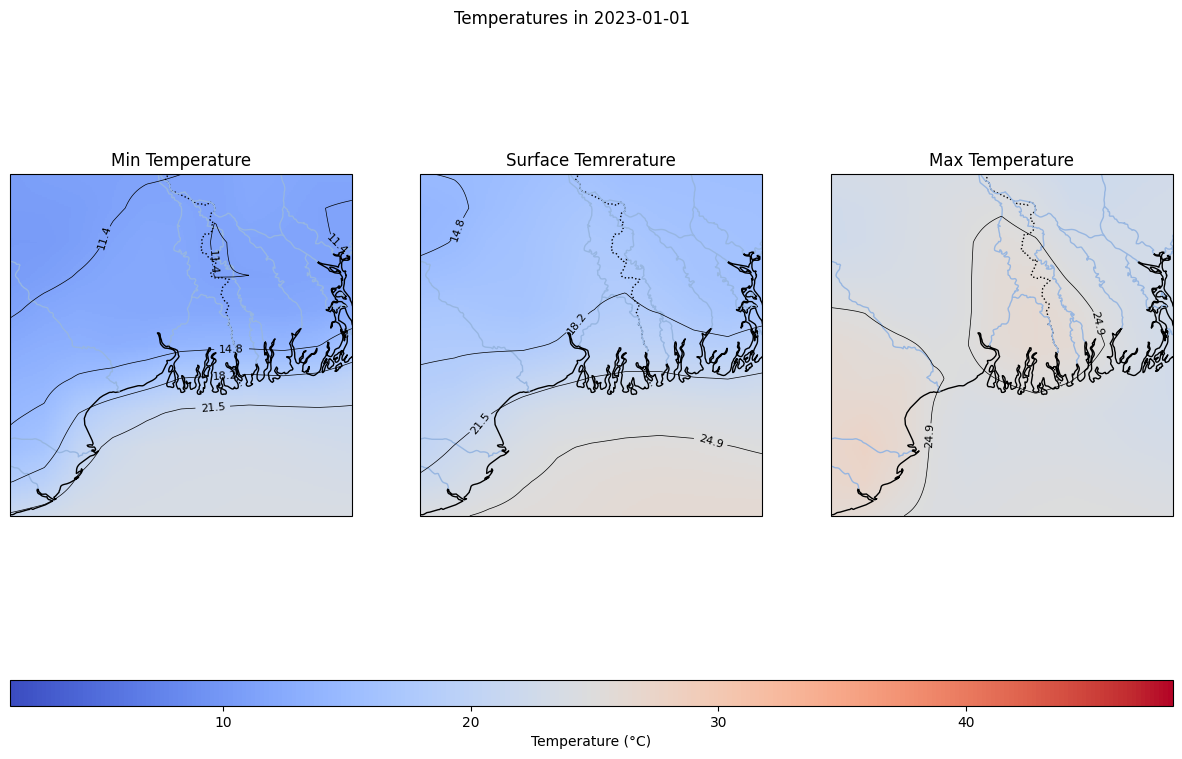

In [15]:
import warnings
warnings.filterwarnings('ignore')

# Convert the DataFrame to an xarray Dataset
ds = df.set_index(['DATE', 'LAT', 'LON']).to_xarray()
ds = ds.rename({'LAT': 'lat', 'LON': 'lon', 'T2M_MAX': 'temperature_max', 'T2M_MIN': 'temperature_min', 'TS':'Surface_temperature'})
temperature_min = ds['temperature_min']
temperature_max = ds['temperature_max']
surface_temperature = ds['Surface_temperature']

# Determine the fixed scale for the colorbar based on the entire dataset
vmin = temperature_min.min().values
vmax = temperature_max.max().values

# Function to plot each frame with interpolation
def plot_frame(date):
    fig.clf()
    gs = GridSpec(2, 3, height_ratios=[1, 0.05], width_ratios=[1, 1,1], hspace=0.3)
    ax_min = fig.add_subplot(gs[0, 0], projection=ccrs.PlateCarree())
    ax_surface = fig.add_subplot(gs[0, 1], projection=ccrs.PlateCarree())
    ax_max = fig.add_subplot(gs[0, 2], projection=ccrs.PlateCarree())

    cax = fig.add_subplot(gs[1, :])

    # Create the subplots for temperature_min and temperature_max
    for ax, temp_data, title in zip([ax_min, ax_surface, ax_max], [temperature_min, surface_temperature, temperature_max], ['Min Temperature', 'Surface Temrerature', 'Max Temperature']):
        ax.set_extent([temp_data.lon.min(), temp_data.lon.max(), temp_data.lat.min(), temp_data.lat.max()], crs=ccrs.PlateCarree())
        ax.coastlines()
        ax.add_feature(cfeature.BORDERS, linestyle=':')
        ax.add_feature(cfeature.LAND, edgecolor='black')
        ax.add_feature(cfeature.LAKES, alpha=0.5)
        ax.add_feature(cfeature.RIVERS)

        day_data = temp_data.sel(DATE=date)

        # Create a grid for interpolation
        lon = np.linspace(day_data.lon.min(), day_data.lon.max(), 200)
        lat = np.linspace(day_data.lat.min(), day_data.lat.max(), 200)
        lon2d, lat2d = np.meshgrid(lon, lat)
        day_data_interp = day_data.interp(lon=lon, lat=lat, method='linear')

        # Create the heatmap with fixed scale and smooth shading
        pcm = ax.pcolormesh(lon2d, lat2d, day_data_interp, shading='auto', cmap='coolwarm', norm=Normalize(vmin=vmin, vmax=vmax))

        # Add contour lines to both plots
        contours = ax.contour(lon2d, lat2d, day_data_interp, levels=np.linspace(vmin, vmax, 15), colors='black', linewidths=0.5)
        ax.clabel(contours, inline=True, fontsize=8, fmt='%1.1f')

        # Update the title
        ax.set_title(title)
        ax.set_xlabel('Longitude')
        ax.set_ylabel('Latitude')

    # Create a single colorbar for both subplots
    cbar = fig.colorbar(pcm, cax=cax, orientation='horizontal', label='Temperature (°C)')
    plt.suptitle(f'Temperatures in {date.strftime("%Y-%m-%d")}')
    plt.tight_layout(rect=[0, 0, 1, 0.95])

# Create the animation
dates = pd.date_range(start='2023-01-01', end='2023-12-31')
fig = plt.figure(figsize=(15, 8))

ani = animation.FuncAnimation(fig, plot_frame, frames=dates, repeat=False)

# Save the animation as a gif file
tem_vid_path = os.path.join(visualization_videos_folder_path, "Temperature_2023.gif")

# Save the animation as a video file or GIF
ani.save(tem_vid_path, writer='pillow', fps=20)

print(f"Animation saved at: {tem_vid_path}")


### **2023 year Heat plot- temperature**
---
This animation video contains only the heat map accourding to the temperature data

In [16]:
import matplotlib.gridspec as gridspec
# Convert the DataFrame to an xarray Dataset
ds = df.set_index(['DATE', 'LAT', 'LON']).to_xarray()
ds = ds.rename({'LAT': 'lat', 'LON': 'lon', 'T2M_MAX': 'temperature_max', 'T2M_MIN': 'temperature_min', 'TS':'Surface_temperature'})
temperature_min = ds['temperature_min']
temperature_max = ds['temperature_max']
surface_temperature = ds['Surface_temperature']

# Determine the fixed scale for the colorbar based on the entire dataset
vmin = temperature_min.min().values
vmax = temperature_max.max().values

# Function to plot each frame with basic heatmap and background map
def plot_frame(date):
    fig.clf()
    gs = gridspec.GridSpec(1, 3, width_ratios=[1, 1, 1], wspace=0.2)

    for i, (temp_data, title) in enumerate(zip([temperature_min, surface_temperature, temperature_max], ['Min Temperature', 'Surface Temperature', 'Max Temperature'])):
        ax = fig.add_subplot(gs[i], projection=ccrs.PlateCarree())
        ax.set_extent([temp_data.lon.min(), temp_data.lon.max(), temp_data.lat.min(), temp_data.lat.max()], crs=ccrs.PlateCarree())
        ax.coastlines()
        ax.add_feature(cfeature.BORDERS, linestyle=':')
        ax.add_feature(cfeature.LAND, edgecolor='black')
        ax.add_feature(cfeature.LAKES, alpha=0.5)
        ax.add_feature(cfeature.RIVERS)

        day_data = temp_data.sel(DATE=date)
        pcm = ax.pcolormesh(day_data.lon, day_data.lat, day_data.values, cmap='coolwarm', vmin=vmin, vmax=vmax)

        ax.set_title(title)
        ax.set_xlabel('Longitude')
        ax.set_ylabel('Latitude')

    plt.suptitle(f'Temperatures on {date.strftime("%Y-%m-%d")}')
    plt.tight_layout(rect=[0, 0, 1, 0.95])

# Create the animation
dates = pd.date_range(start='2023-01-01', end='2023-12-31')

fig = plt.figure(figsize=(15, 6))

ani = animation.FuncAnimation(fig, plot_frame, frames=dates, repeat=False)

# Save the animation as a gif file

tem_vid_path = os.path.join(visualization_videos_folder_path, "Heat_map_Temperature_2023.gif")
ani.save(tem_vid_path, writer='pillow', fps=20)

print(f"Animation saved at: {tem_vid_path}")

plt.show()

## **Wind Direction and Wind Speed Animation**
---

In this section, an animated video plot is generated to visualize the wind direction and wind speed metrics, specifically:

- **Wind Direction (`W10D`)**: Represents the direction of the wind.
- **Max Wind Speed (`MAXW10`)**: Indicates the maximum wind speed measured 10 meters above the ground.
- **Min Wind Speed (`MINW10`)**: Represents the minimum wind speed measured 10 meters above the ground.

### Video Animation

A video animation is created to illustrate the temporal changes in these wind metrics over the course of the year.

### Implementation Details

- Utilizes matplotlib and its animation capabilities to generate the dynamic visualization.
- Each frame in the animation represents a snapshot of wind direction and speed changes at different time intervals throughout the year.

### Insights

This visualization provides a clear understanding of wind patterns and their intensity, which is crucial for meteorological analysis and forecasting.



###**2023 year** wind direction

Animation saved at: Downloads/south bengal weather\Visualization\Wind_Direction_2023.gif


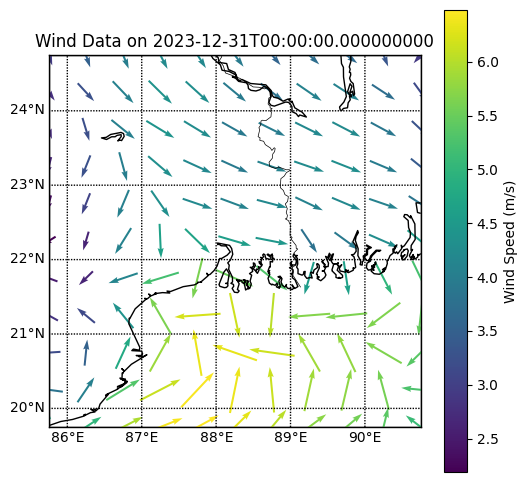

In [ ]:
from scipy.interpolate import griddata
from mpl_toolkits.basemap import Basemap

# Convert the DataFrame to an xarray Dataset
ds = weather_data.set_index(['DATE', 'LAT', 'LON']).to_xarray()

# Rename the variables accordingly
ds = ds.rename({'WD10M': 'WindDirection', 'WS10M_MAX': 'WindSpeed'})

# Extract unique latitudes, longitudes, and dates
ds = ds.sel(DATE=slice('2023-01-01', '2023-12-31'))
lat = np.unique(ds['LAT'].values)
lon = np.unique(ds['LON'].values)
dates = np.unique(ds['DATE'].values)

# Initialize arrays for reshaped wind data
num_dates = len(dates)
num_lat = len(lat)
num_lon = len(lon)

wind_speed_data = np.zeros((num_dates, num_lat, num_lon))
wind_direction_data = np.zeros((num_dates, num_lat, num_lon))

# Reshape the data into 2D arrays for each date
for i, date in enumerate(dates):
    daily_data = ds.sel(DATE=date)
    wind_speed_data[i] = daily_data['WindSpeed'].values.reshape(num_lat, num_lon)
    wind_direction_data[i] = daily_data['WindDirection'].values.reshape(num_lat, num_lon)

# Create a grid for longitude and latitude
lon_grid, lat_grid = np.meshgrid(lon, lat)

def interpolate_wind_data(lon, lat, data, lon_grid, lat_grid):
    lon_flat = lon_grid.flatten()
    lat_flat = lat_grid.flatten()
    data_flat = data.flatten()
    points = np.vstack((lon_flat, lat_flat)).T
    return griddata(points, data_flat, (lon_grid, lat_grid), method='linear')

def plot_frame(date_idx):
    plt.clf()
    plt.title(f"Wind Data on {dates[date_idx]}")

    # Interpolate wind speed and direction onto the grid
    wind_speed_interp = interpolate_wind_data(lon, lat, wind_speed_data[date_idx], lon_grid, lat_grid)
    wind_direction_interp = interpolate_wind_data(lon, lat, wind_direction_data[date_idx], lon_grid, lat_grid)

    # Create a Basemap instance
    m = Basemap(projection='cyl', llcrnrlat=min(lat), urcrnrlat=max(lat), llcrnrlon=min(lon), urcrnrlon=max(lon), resolution='i')
    m.drawcoastlines()
    m.drawcountries()
    m.drawmapboundary()
    m.drawparallels(np.arange(round(min(lat)), round(max(lat)), 1), labels=[1,0,0,0])
    m.drawmeridians(np.arange(round(min(lon)), round(max(lon)), 1), labels=[0,0,0,1])

    # Create quiver plot
    u = wind_speed_interp * np.cos(np.radians(wind_direction_interp))
    v = wind_speed_interp * np.sin(np.radians(wind_direction_interp))
    x, y = m(lon_grid, lat_grid)
    m.quiver(x, y, u, v, wind_speed_interp, scale=50, pivot='middle')

    plt.colorbar(label='Wind Speed (m/s)')
    plt.grid(True)

def animate(dates):
    fig = plt.figure(figsize=(6,6))
    ani = animation.FuncAnimation(fig, plot_frame, frames=len(dates), repeat=False)

    # Save the animation as a gif file
    file_save = os.path.join(visualization_videos_folder_path, 'Wind_Direction_2023.gif')
    ani.save(file_save, writer='pillow', fps=20)

    print(f"Animation saved at: {file_save}")

# Make sure the number of date entries matches the number of time steps in your data
if len(dates) != len(wind_speed_data):
    raise ValueError("The number of dates does not match the number of time steps in the data")

animate(dates)

###**2023 year** wind Speed
---
Max wind speed and Min wind speed

Animation saved at: Downloads/south bengal weather\Visualization\Wind_Speed_2023.gif


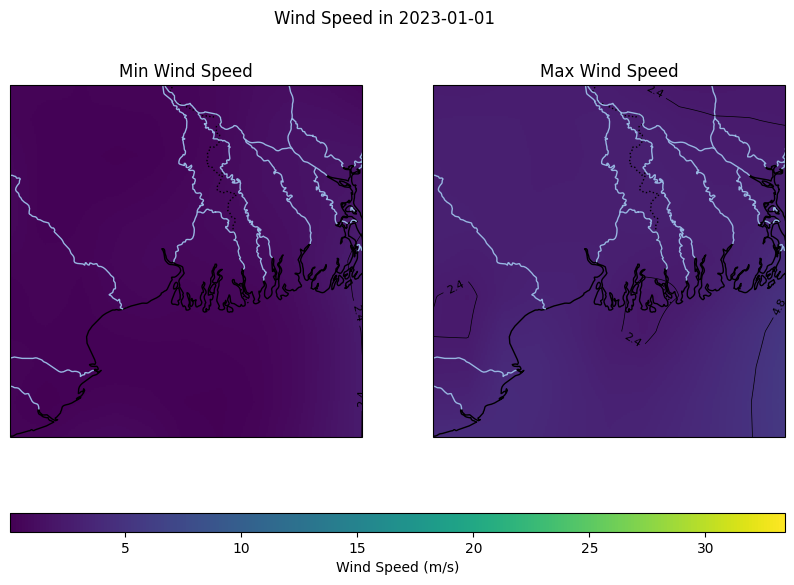

In [ ]:
# Convert the DataFrame to an xarray Dataset
ds = df.set_index(['DATE', 'LAT', 'LON']).to_xarray()
ds = ds.rename({'LAT': 'lat', 'LON': 'lon', 'WS10M_MAX': 'wind_speed_max', 'WS10M_MIN': 'wind_speed_min'})
wind_speed_min = ds['wind_speed_min']
wind_speed_max = ds['wind_speed_max']

# Determine the fixed scale for the colorbar based on the entire dataset
vmin = wind_speed_min.min().values
vmax = wind_speed_max.max().values

# Function to plot each frame with interpolation
def plot_frame(date):
    fig.clf()
    gs = GridSpec(2, 2, height_ratios=[1, 0.05], width_ratios=[1, 1], hspace=0.3)
    ax_min = fig.add_subplot(gs[0, 0], projection=ccrs.PlateCarree())
    ax_max = fig.add_subplot(gs[0, 1], projection=ccrs.PlateCarree())
    cax = fig.add_subplot(gs[1, :])

    # Create the subplots for wind_speed_min and wind_speed_max
    for ax, temp_data, title in zip([ax_min, ax_max], [wind_speed_min, wind_speed_max], ['Min Wind Speed', 'Max Wind Speed']):
        ax.set_extent([temp_data.lon.min(), temp_data.lon.max(), temp_data.lat.min(), temp_data.lat.max()], crs=ccrs.PlateCarree())
        ax.coastlines()
        ax.add_feature(cfeature.BORDERS, linestyle=':')
        ax.add_feature(cfeature.LAND, edgecolor='black')
        ax.add_feature(cfeature.LAKES, alpha=0.5)
        ax.add_feature(cfeature.RIVERS)

        day_data = temp_data.sel(DATE=date)

        # Create a grid for interpolation
        lon = np.linspace(day_data.lon.min(), day_data.lon.max(), 200)
        lat = np.linspace(day_data.lat.min(), day_data.lat.max(), 200)
        lon2d, lat2d = np.meshgrid(lon, lat)
        day_data_interp = day_data.interp(lon=lon, lat=lat, method='linear')

        # Create the heatmap with fixed scale and smooth shading
        pcm = ax.pcolormesh(lon2d, lat2d, day_data_interp, shading='auto', norm=Normalize(vmin=vmin, vmax=vmax))

        # Add contour lines to both plots
        contours = ax.contour(lon2d, lat2d, day_data_interp, levels=np.linspace(vmin, vmax, 15), colors='black', linewidths=0.5)
        ax.clabel(contours, inline=True, fontsize=8, fmt='%1.1f')

        # Update the title
        ax.set_title(title)
        ax.set_xlabel('Longitude')
        ax.set_ylabel('Latitude')

    # Create a single colorbar for both subplots
    cbar = fig.colorbar(pcm, cax=cax, orientation='horizontal', label='Wind Speed (m/s)')
    plt.suptitle(f'Wind Speed in {date.strftime("%Y-%m-%d")}')
    plt.tight_layout(rect=[0, 0, 1, 0.95])

# Create the animation
dates = pd.date_range(start='2023-01-01', end='2023-12-31')
fig = plt.figure(figsize=(10, 6))

ani = animation.FuncAnimation(fig, plot_frame, frames=dates, repeat=False)

# Save the animation as a gif file
vid_path = os.path.join(visualization_videos_folder_path, "Wind_Speed_2023.gif")

# Save the animation as a video file or GIF
ani.save(vid_path, writer='pillow', fps=20)

print(f"Animation saved at: {vid_path}")


## **Rainfall Animation**
---

In this section, an animated video plot is generated to visualize the rainfall (measured in mm) throughout the year.

### Video Animation

A video animation is created to illustrate the temporal changes in rainfall distribution over the course of the year.

### Plotting Details

- **Rainfall (mm)**: Displays the amount of rainfall recorded at various locations over different time intervals in through out the year.

### Implementation Details

- Utilizes matplotlib and its animation capabilities to generate the dynamic visualization.
- Each frame in the animation represents a snapshot of rainfall distribution at different time intervals throughout the year.

### Insights

This visualization provides a clear understanding of rainfall patterns, seasonal variations, and distribution, which is essential for climate analysis and forecasting.



###1984 and 2023 year rainfall

Animation saved at: Downloads/south bengal weather\Visualization\rainfall_2023.gif


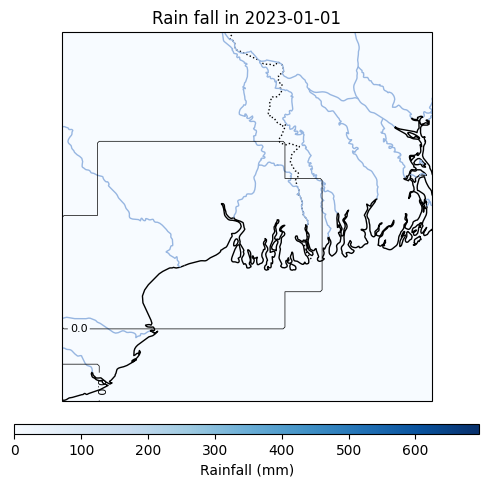

In [ ]:
warnings.filterwarnings('ignore')

# Convert the DataFrame to an xarray Dataset
ds = df.set_index(['DATE', 'LAT', 'LON']).to_xarray()
ds = ds.rename({'LAT': 'lat', 'LON': 'lon', 'PRECTOTCORR': 'rainfall'})
rainfall_data = ds['rainfall']

# Determine the fixed scale for the colorbar based on the entire dataset
vmin = rainfall_data.min().values
vmax = rainfall_data.max().values

# Function to plot each frame with interpolation
def plot_frame(date):
    plt.clf()
    ax = plt.axes(projection=ccrs.PlateCarree())
    ax.set_extent([rainfall_data.lon.min(), rainfall_data.lon.max(), rainfall_data.lat.min(), rainfall_data.lat.max()], crs=ccrs.PlateCarree())
    ax.coastlines()
    ax.add_feature(cfeature.BORDERS, linestyle=':')
    ax.add_feature(cfeature.LAND, edgecolor='black')
    ax.add_feature(cfeature.LAKES, alpha=0.5)
    ax.add_feature(cfeature.RIVERS)

    day_data = rainfall_data.sel(DATE=date)

    # Create a grid for interpolation
    lon = np.linspace(day_data.lon.min(), day_data.lon.max(), 200)
    lat = np.linspace(day_data.lat.min(), day_data.lat.max(), 200)
    lon2d, lat2d = np.meshgrid(lon, lat)
    day_data_interp = day_data.interp(lon=lon, lat=lat, method='linear')

    # Create the heatmap with fixed scale and smooth shading
    pcm = ax.pcolormesh(lon2d, lat2d, day_data_interp, shading='auto', cmap='Blues', norm=Normalize(vmin=vmin, vmax=vmax))
    plt.colorbar(pcm, ax=ax, orientation='horizontal', pad=0.05, aspect=50, label='Rainfall (mm)')

    # Add contour lines
    contours = ax.contour(lon2d, lat2d, day_data_interp, levels=np.linspace(vmin, vmax, 15), colors='black', linewidths=0.5)
    plt.clabel(contours, inline=True, fontsize=8, fmt='%1.1f')

    # Update the title to include only year and month
    plt.title(f'Rain fall in {date.strftime("%Y-%m-%d")}')
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')

# Create the animation
fig = plt.figure(figsize=(6, 6))
dates = pd.date_range(start='2023-01-01', end='2023-12-31')


ani = animation.FuncAnimation(fig, plot_frame, frames=dates, repeat=False)

# Save the animation as a gif file

file_save = os.path.join(visualization_videos_folder_path,'rainfall_2023.gif')
# Save the animation as a video file or GIF
ani.save(file_save, writer='pillow', fps=10)

print(f"Animation saved at: {file_save}")

## **Atmospheric Pressure**
---

In this section, a plot is generated to visualize atmospheric pressure data.

### Plotting Details

- **Atmospheric Pressure**: Represents the force exerted by the weight of the atmosphere above a specific point.
- **Units**: Atmospheric pressure is measured in Pascals (Pa) or hectopascals (hPa), where 1 hPa = 100 Pa.

### Implementation Details

- Utilizes plotting libraries to generate a static or dynamic visualization of atmospheric pressure data.
- The plot illustrates the distribution and variation of atmospheric pressure over the specified time period or geographic locations.

### Insights

This visualization helps in understanding pressure patterns, which are crucial for weather prediction and climate studies. It provides insights into high-pressure and low-pressure zones and their impact on weather conditions.



In [ ]:
df.head()

,LAT,LON,year,month,day,ALLSKY_SFC_SW_DWN,TS,T2M_MAX,T2M_MIN,RH2M,PRECTOTCORR,PS,WS10M_MAX,WS10M_MIN,WD10M,DATE
0,19.75,85.75,1984,1,1,3.66,22.50,25.41,17.99,56.76,0.0,101.41,5.40,1.67,78.54,1984-01-01
1,19.75,86.25,1984,1,1,3.92,22.78,24.77,19.58,56.03,0.0,101.63,5.76,2.39,71.94,1984-01-01
2,19.75,86.75,1984,1,1,3.92,24.20,23.71,21.88,53.41,0.0,101.65,5.99,2.12,56.81,1984-01-01
3,19.75,87.25,1984,1,1,4.02,25.31,23.52,22.81,52.54,0.0,101.67,6.38,2.41,41.54,1984-01-01
4,19.75,87.75,1984,1,1,4.02,25.88,23.53,23.04,52.41,0.0,101.68,6.65,3.01,36.35,1984-01-01


Animation saved at: Downloads/south bengal weather\Visualization\pressure_2023.gif


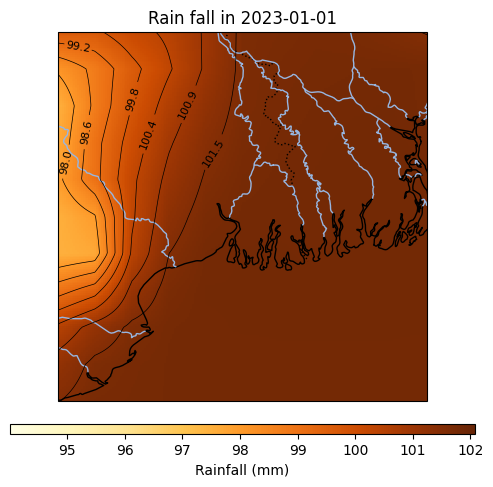

In [ ]:
warnings.filterwarnings('ignore')

# Convert the DataFrame to an xarray Dataset
ds = df.set_index(['DATE', 'LAT', 'LON']).to_xarray()
ds = ds.rename({'LAT': 'lat', 'LON': 'lon', 'PS': 'pressure'})
pressure_data = ds['pressure']

# Determine the fixed scale for the colorbar based on the entire dataset
vmin = pressure_data.min().values
vmax = pressure_data.max().values

# Function to plot each frame with interpolation
def plot_frame(date):
    plt.clf()
    ax = plt.axes(projection=ccrs.PlateCarree())
    ax.set_extent([pressure_data.lon.min(), pressure_data.lon.max(), pressure_data.lat.min(), pressure_data.lat.max()], crs=ccrs.PlateCarree())
    ax.coastlines()
    ax.add_feature(cfeature.BORDERS, linestyle=':')
    ax.add_feature(cfeature.LAND, edgecolor='black')
    ax.add_feature(cfeature.LAKES, alpha=0.5)
    ax.add_feature(cfeature.RIVERS)

    day_data = pressure_data.sel(DATE=date)

    # Create a grid for interpolation
    lon = np.linspace(day_data.lon.min(), day_data.lon.max(), 200)
    lat = np.linspace(day_data.lat.min(), day_data.lat.max(), 200)
    lon2d, lat2d = np.meshgrid(lon, lat)
    day_data_interp = day_data.interp(lon=lon, lat=lat, method='linear')

    # Create the heatmap with fixed scale and smooth shading
    pcm = ax.pcolormesh(lon2d, lat2d, day_data_interp, shading='auto', cmap='YlOrBr', norm=Normalize(vmin=vmin, vmax=vmax))
    plt.colorbar(pcm, ax=ax, orientation='horizontal', pad=0.05, aspect=50, label='Rainfall (mm)')

    # Add contour lines
    contours = ax.contour(lon2d, lat2d, day_data_interp, levels=np.linspace(vmin, vmax, 15), colors='black', linewidths=0.5)
    plt.clabel(contours, inline=True, fontsize=8, fmt='%1.1f')

    # Update the title to include only year and month
    plt.title(f'Rain fall in {date.strftime("%Y-%m-%d")}')
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')

# Create the animation
fig = plt.figure(figsize=(6, 6))
dates = pd.date_range(start='2023-01-01', end='2023-12-31')


ani = animation.FuncAnimation(fig, plot_frame, frames=dates, repeat=False)

# Save the animation as a gif file

file_save = os.path.join(visualization_videos_folder_path,'pressure_2023.gif')
# Save the animation as a video file or GIF
ani.save(file_save, writer='pillow', fps=10)

print(f"Animation saved at: {file_save}")

# **Data Processing**
---

### Wind Direction Radian Conversion

To facilitate normalization, the wind direction values are converted into radians:

- Wind direction values are typically large in degrees. Converting them to radians helps in normalization and is beneficial for certain calculations.

### Conversion to 4D Array

The `weather_df` dataset is transformed into a 4D array format `(days, features, lat, lon)`:

- This transformation organizes the data into a structured format suitable for analysis and modeling.
- The dataset includes 9 features, with `PRECTOTCORR` identified as a dependent feature, posing challenges for forecasting tasks.

### Features Explanation

- **PRECTOTCORR**: Represents a dependent feature that requires special handling due to its forecasting complexity.



In [ ]:
weather_data.head()

,LAT,LON,year,month,day,ALLSKY_SFC_SW_DWN,TS,T2M_MAX,T2M_MIN,RH2M,PRECTOTCORR,PS,WS10M_MAX,WS10M_MIN,WD10M,DATE
0,19.75,85.75,1984,1,1,3.66,22.50,25.41,17.99,56.76,0.0,101.41,5.40,1.67,78.54,1984-01-01
1,19.75,86.25,1984,1,1,3.92,22.78,24.77,19.58,56.03,0.0,101.63,5.76,2.39,71.94,1984-01-01
2,19.75,86.75,1984,1,1,3.92,24.20,23.71,21.88,53.41,0.0,101.65,5.99,2.12,56.81,1984-01-01
3,19.75,87.25,1984,1,1,4.02,25.31,23.52,22.81,52.54,0.0,101.67,6.38,2.41,41.54,1984-01-01
4,19.75,87.75,1984,1,1,4.02,25.88,23.53,23.04,52.41,0.0,101.68,6.65,3.01,36.35,1984-01-01


In [ ]:
wind_direction = weather_data['WD10M']
wind_direction_radians = np.deg2rad(wind_direction)
weather_data['WD10Mrad'] = wind_direction_radians


In [ ]:
weather_data.head()

,LAT,LON,year,month,day,ALLSKY_SFC_SW_DWN,TS,T2M_MAX,T2M_MIN,RH2M,PRECTOTCORR,PS,WS10M_MAX,WS10M_MIN,WD10M,DATE,WD10Mrad
0,19.75,85.75,1984,1,1,3.66,22.50,25.41,17.99,56.76,0.0,101.41,5.40,1.67,78.54,1984-01-01,1.370782
1,19.75,86.25,1984,1,1,3.92,22.78,24.77,19.58,56.03,0.0,101.63,5.76,2.39,71.94,1984-01-01,1.255590
2,19.75,86.75,1984,1,1,3.92,24.20,23.71,21.88,53.41,0.0,101.65,5.99,2.12,56.81,1984-01-01,0.991522
3,19.75,87.25,1984,1,1,4.02,25.31,23.52,22.81,52.54,0.0,101.67,6.38,2.41,41.54,1984-01-01,0.725010
4,19.75,87.75,1984,1,1,4.02,25.88,23.53,23.04,52.41,0.0,101.68,6.65,3.01,36.35,1984-01-01,0.634427


The process of making the 4D array which is the actual data

In [ ]:
# Extract unique dates, longitudes, and latitudes
unique_dates = weather_data['DATE'].unique()
unique_longitudes = weather_data['LON'].unique()
unique_latitudes = weather_data['LAT'].unique()[::-1]

# Create a dictionary to store 3D arrays for each feature
features = ['TS','T2M_MAX','T2M_MIN','RH2M','PS', 'WD10Mrad', 'WS10M_MAX', 'WS10M_MIN','ALLSKY_SFC_SW_DWN']
feature_arrays = {feature: np.full((len(unique_dates), len(unique_latitudes), len(unique_longitudes)), np.nan) for feature in features}

# Populate the 3D arrays
for i, date in enumerate(unique_dates):
    daily_data = weather_data[weather_data['DATE'] == date]
    for _, row in daily_data.iterrows():
        lat_idx = np.where(unique_latitudes == row['LAT'])[0][0]
        lon_idx = np.where(unique_longitudes == row['LON'])[0][0]
        for feature in features:
            feature_arrays[feature][i, lat_idx, lon_idx] = row[feature]

# Stack the 3D arrays along a new axis to form a single 3D array for each date
stacked_arrays = np.stack([feature_arrays[feature] for feature in features], axis=0)

# The shape of stacked_arrays will be (9, len(unique_dates), len(unique_latitudes), len(unique_longitudes))
# Now we need to reorder the dimensions to match the desired shape (len(unique_dates), 9, len(unique_latitudes), len(unique_longitudes))

# Rearrange dimensions to [14310, 9, 11, 11]
final_4d_array = np.transpose(stacked_arrays, (1,0,2,3))

# Convert to a NumPy array
final_4d_array = np.array(final_4d_array)

# Check the shape of the final 4D array
print(final_4d_array.shape)

(14610, 9, 11, 11)
